# User path setting

In [1]:
# none

# Running

## Defult path setting

In [2]:
# path using \ instead of /
model_saved_name="model_tl.ckpt"
dataset_path=r"data\tl_dataset"

verify_dataset_path=r"\valid.mat"
#verify_dataset_path=r"\data_processed.mat"

## processing...

In [3]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

import NW_LSTM
import NN_DataLoader

# Check if CUDA is available and if so, set the device to GPU
device = torch.device("cpu")
print("Device using ", device)


Device using  cpu


material_name:  modelE
Data points num:  382


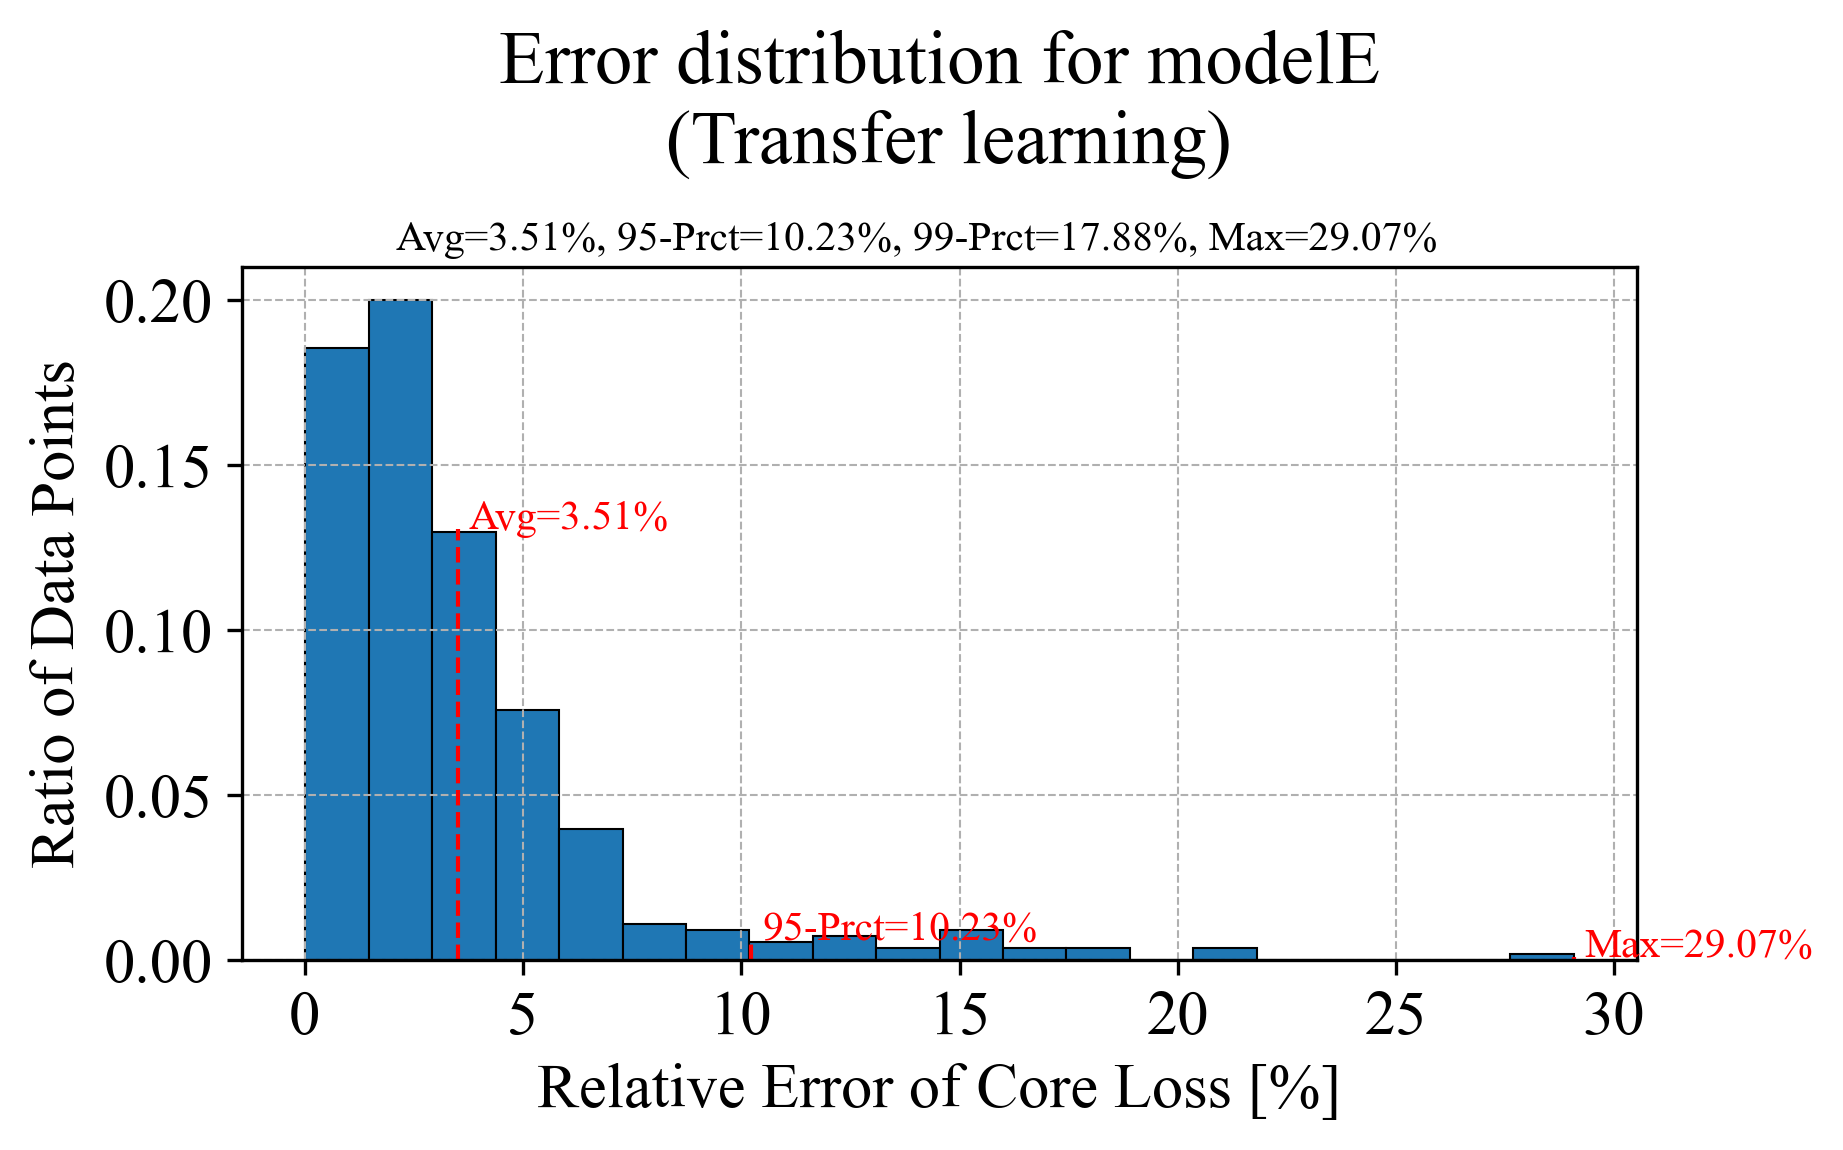

In [4]:
import Maglib
import os
import MagNet
import linear_std

# magData = Maglib.MagLoader(dataset_path+r"\test.mat")
magData = Maglib.MagLoader(dataset_path+verify_dataset_path)

######################

# get current folder name
material_name = os.path.basename(os.getcwd())
material_name = material_name.split('_')[2]
print("material_name: ", material_name)
print("Data points num: ", magData.b.shape[0])

std_loss = linear_std.linear_std()
std_loss.load(dataset_path+r"\std_loss.stdd")

std_temp = linear_std.linear_std()
std_temp.load(dataset_path+r"\std_temp.stdd")

std_freq = linear_std.linear_std()
std_freq.load(dataset_path+r"\std_freq.stdd")

std_b = linear_std.linear_std()
std_b.load(dataset_path+r"\std_b.stdd")


data_b = std_b.unstd(magData.b)
data_temp = std_temp.unstd(magData.temp)
data_freq = std_freq.unstd(magData.freq)
data_loss = std_loss.unstd(magData.loss)


pred_loss=MagNet.MagLoss(
    data_b,data_temp,data_freq,
    model_saved_name,
    dataset_path,
    function_use="vali",)

data_loss=data_loss[:pred_loss.shape[0]]

mean_relv=np.mean(pred_loss/data_loss)

#pred_loss=pred_loss/mean_relv   # whether to use mean_relv or not
relv_err=np.abs(pred_loss-data_loss)/data_loss
# filter out the biggest 3% data
#relv_err=np.sort(relv_err,axis=0)
#relv_err=relv_err[:int(relv_err.shape[0]*0.98),:]


MagNet.Mag_plot(material_name+"\n (Transfer learning)",relv_err,"",0)

variance=np.var(pred_loss/data_loss,axis=0)

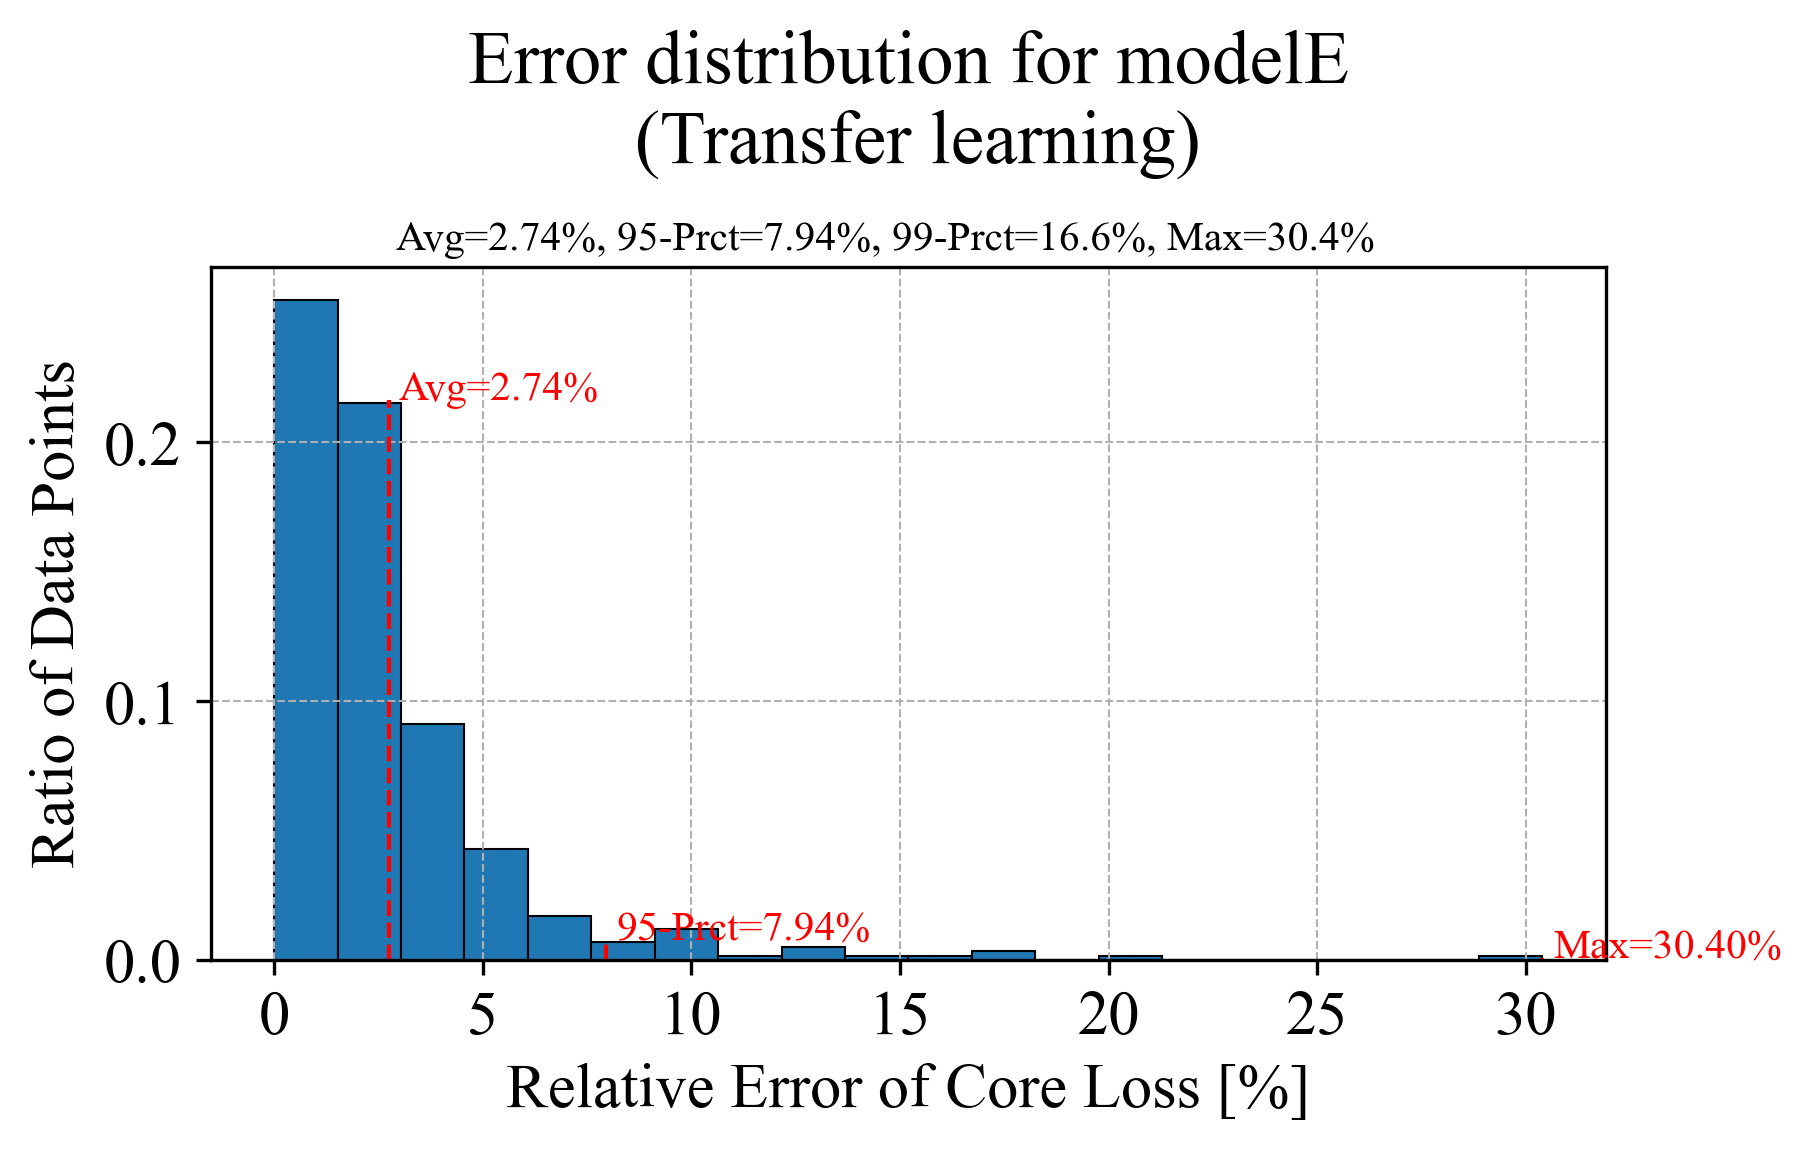

In [5]:
test_num=100

# # create a new np zero array having the same shape as pred_loss
pred_losses=np.zeros((pred_loss.shape[0],test_num))
for i in range(test_num):
    pred_losses[:,i:i+1] = MagNet.MagLoss(
    data_b,data_temp,data_freq,
    model_saved_name,
    dataset_path,
    function_use="vali",)

pred_loss_avg=np.mean(pred_losses,axis=1)
pred_loss_avg=pred_loss_avg[:,np.newaxis]

relv_err=np.abs(pred_loss_avg-data_loss)/data_loss
MagNet.Mag_plot(material_name+"\n (Transfer learning)",relv_err,"",0)

In [6]:
# for i in range(pred_loss_avg.shape[0]):
#     pred_dist=pred_losses[i,:]
#     real_dist=data_loss[i]

#     # plot the distribution of the first data point
#     plt.figure()
#     plt.hist(pred_dist, bins=20, )
#     # draw a vertical line at the real_dist
#     plt.axvline(real_dist, color='red', linestyle='dashed', linewidth=3)
#     # draw a vertical line at the mean of the distribution
#     plt.axvline(pred_dist.mean(), color='green', linestyle='dashed', linewidth=3)

#     plt.show()